In [1]:
import pandas as pd
import numpy as np
import sklearn as scikit_learn
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from konlpy.tag import Okt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import urllib.request
# import mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jaemin\Anaconda3\envs\py38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_price=pd.read_excel('../data/가격데이터_증감비교_라벨링_가격등락비율.xlsx')

In [4]:
df_news_list=[]
for i in range(208):
    with open('../data/data/stem_list{}.txt'.format(i),'r',encoding='UTF-8') as f:
        lines = f.readlines()
        df_news_list.append(lines)

In [5]:
df_news_list[150]

['정부 ASF ASF 피해 ASF 피해 농가 대한 대한 재입 식 재개 또한 또한 경기 강원 강원 개 강원 개 시 군 처음 ASF 중점 방역 관리 지구 지정 아프리카 열병 아프리카 열병 중앙 사고 수습 본부 긴급 행동지침 SOP 과 전문가 과 전문가 의견 검토 지난 지난 지난 양돈 농장 아프리카 열병 발생 잠정 잠정 중단 잠정 중단 하다 경기 강원 양돈 농장 강원 양돈 농장 강원 양돈 농장 재입 식 강원 양돈 농장 재입 식 절차 다시 다시 추진 기존 기존 재입 식 기존 재입 식 평가 양돈 농장 입 식 신고 입 식 신고 및 입 식 신고 및 입 식 신고 및 공급 입 식 신고 및 공급 계약 상황 중 재입 식이 재입 식이 가능하다 수 재입 식이 가능하다 수 있다 것 전망 또한 아프리카 열병 또한 아프리카 열병 발생 사 육 멧돼지 시 군 시 군 인접 시 군 인접 시 군 총 개 총 개 시 군 중점 방역 관리 지구 로 지정 방역 관리 강화 키로 개 개 시 군 ASF 발생 ASF 발생 개 ASF 발생 개 시 군 김포 강화 연천 파주 포천 화천 철원 양구 인제 고성 춘천 양돈 농장 호 과 인접 과 인접 개 과 인접 개 시 군 고양 양주 동두천 가평 남양주 홍천 양양 호 등 양돈 장 등 양돈 장 호가 등 양돈 장 호가 해당 중점 방역 관리 지구 내 중점 방역 관리 지구 내 양돈 농장 가지 가지 강화 가지 강화 되다 방역 시설 가지 강화 되다 방역 시설 기준 외부 울타리 방조 방충 망 폐 사체 폐 사체 보관 시설 내부 울타리 입 출하 대 방역 실 전 실 물품 반입 시설 물품 반입 시설 개 물품 반입 시설 개 항목 개월내 마련 이 관련 이 재욱 이 재욱 농림축산식품부 이 재욱 농림축산식품부 차관 오전 오전 개최 오전 개최 되다 가축 질병 오전 개최 되다 가축 질병 방역 상황 점검 영상 회의 오늘 경기 강원 개 시 살 처분 수 매 수 매 농장 수 매 농장 호의 수 매 농장 호의 재입 식 수 매 농장 호의 재입 식 절차 중점 방역 관리 지구 지자체 관내 관내 양돈 농장 내년 내년 전 

### embedding list 형태로 만들기

In [6]:
embedding_list=[]

for week_news in df_news_list:
    embedding_list.append(week_news[0])

vocab = list(set(w for doc in embedding_list for w in doc.split()))
vocab.sort()

# 총 문서의 수
N = len(embedding_list) 
print(N)

208


In [7]:
# 단어 종류의 갯수
len(vocab)

5366

In [8]:
day_news_list=[]
vocab_dic={}

In [9]:
for day_news in embedding_list:
    day_news_list.append(day_news.split())

In [10]:
for vocabulary in vocab:
    for i in range(len(day_news_list)):
        if str(vocabulary) in day_news_list[i]:
            if vocabulary in vocab_dic:
                vocab_dic[vocabulary] += 1
            else:
                vocab_dic[vocabulary] = 1

In [20]:

vocab_dic

{'A': 7,
 'AI': 16,
 'APVS': 2,
 'ASF': 108,
 'AT': 2,
 'ATOM': 1,
 'Animal': 1,
 'B': 1,
 'BMEL': 1,
 'BSE': 1,
 'Business': 1,
 'C': 1,
 'CCTV': 1,
 'CIF': 1,
 'CJ': 2,
 'CME': 1,
 'CPTPP': 2,
 'CSF': 2,
 'Center': 1,
 'Chart': 1,
 'CoV': 1,
 'Consumer': 1,
 'Control': 1,
 'DB': 1,
 'DMZ': 2,
 'Diseases': 1,
 'EU': 12,
 'F': 4,
 'FCR': 1,
 'FMD': 4,
 'FTA': 12,
 'FVC': 1,
 'GGP': 3,
 'GO': 1,
 'GP': 3,
 'GPS': 2,
 'GUN': 1,
 'HACCP': 1,
 'HMR': 1,
 'ICT': 3,
 'IMC': 1,
 'JP': 1,
 'JTBC': 1,
 'KBS': 1,
 'KSTAR': 1,
 'L': 1,
 'MC': 1,
 'MOU': 6,
 'MSY': 14,
 'NH': 2,
 'NSP': 3,
 'NULL': 10,
 'National': 1,
 'Neisse': 1,
 'O': 4,
 'OIE': 6,
 'P': 18,
 'PC': 1,
 'PCR': 2,
 'PED': 14,
 'PM': 2,
 'PPL': 1,
 'PRDC': 1,
 'PRRS': 2,
 'PSY': 8,
 'Polymerase': 1,
 'RFID': 1,
 'SARS': 1,
 'SBS': 1,
 'SFEED': 1,
 'SNS': 2,
 'SOP': 10,
 'SP': 1,
 'SPS': 2,
 'STC': 1,
 'Spree': 1,
 'TPP': 1,
 'TV': 6,
 'WTO': 2,
 'YLD': 1,
 'aT': 5,
 'and': 1,
 'chain': 1,
 'for': 1,
 'g': 13,
 'kg': 24,
 'km': 22,

## 가격 등락 비율 뉴스데이터와 맵핑

In [12]:
df_all=pd.DataFrame(embedding_list)

In [13]:
df_all.shape

(208, 1)

In [21]:
df_all

,0
0,종돈 종돈 마리 종돈 마리 수입 최고 종개 협 종개 협 신규 종개 협 신규 종돈 장...
1,돈육 돈육 수입 돈육 수입 최고 자급 률 자급 률 하락 전 년비 전 년비 전 년비 ...
2,지난해 지난해 수입 지난해 수입 돈육 소비 수입 수입 증가 재고 전지 전지 등 전지...
3,안전 안전 한 생산 정부 농가 구제역 구제역 백신 구제역 백신 구제역 백신 접종 품...
4,돈육 돈육 소비 돈육 소비 kg 전 년 kg 우리 우리 국민 우리 국민 돼지고기 돼...
5,값 값 최저 전 년비 전 년비 전 년비 하락 물량 물량 늘 소비 소비 호재 급락 가...
6,NULL
7,한 한 값 한 값 강세 취했 농장 농장 성적 퇴보 작년 작년 한 작년 한 값 작년 ...
8,양돈 장 양돈 장 계속 팔지 농가 고민 고민 중 양돈 양돈 가치 업체 호시탐탐 높다...
9,상반기 상반기 사료 원료 상반기 사료 원료 가격 상반기 사료 원료 가격 상승세 작년...


In [14]:
df_price_new=df_price.iloc[1:209,4:]

In [15]:
df_price_new=df_price_new.reset_index(drop=True)

In [16]:
df_price_new.shape

(208, 2)

In [17]:
df=pd.merge(df_all, df_price_new, left_index=True, right_index=True, how='left')

In [18]:
df.to_excel('../data/최종_데이터셋.xlsx',index=False)

### 가격 그래프 확인해보기

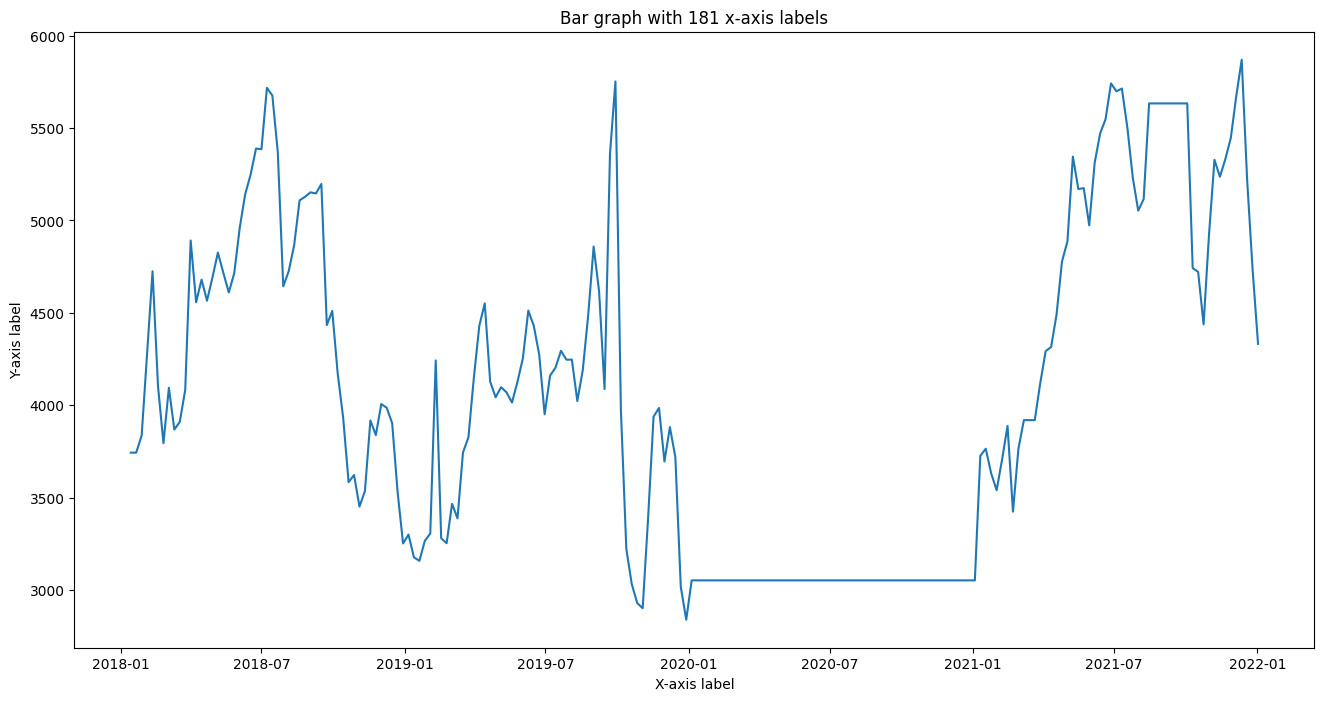

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 생성
x_labels = df_price['도축일']
y_values = df_price['경락단가']

# 그래프 크기 설정
plt.figure(figsize=(16,8))

# 막대 그래프 그리기
plt.plot(x_labels, y_values)


# 그래프 타이틀과 축 라벨 설정
plt.title('Bar graph with 181 x-axis labels')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# 그래프 보여주기
plt.show()